In [1]:
# Reading all necessary

import pandas as pd
import numpy as np
import statsmodels.api as sm

#import warnings
#warnings.filterwarnings('ignore')

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly

In [2]:
# Reading the dataset
df=pd.read_csv('spam_ham_dataset.csv',header=0)

In [3]:
df.shape

(5171, 4)

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [6]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [7]:
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [8]:
df.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


# Visualization

<AxesSubplot:ylabel='label'>

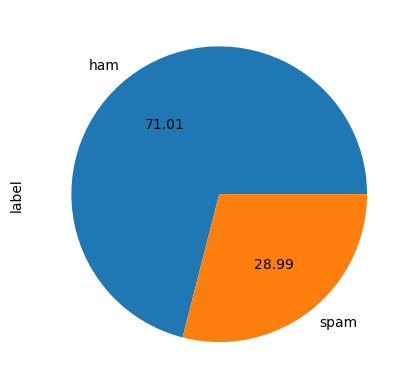

In [10]:
#code snippet creates a pie chart to visualize the distribution of a categorical variable 'label' in the dataframe
df['label'].value_counts().plot(kind="pie",autopct="%0.2f")

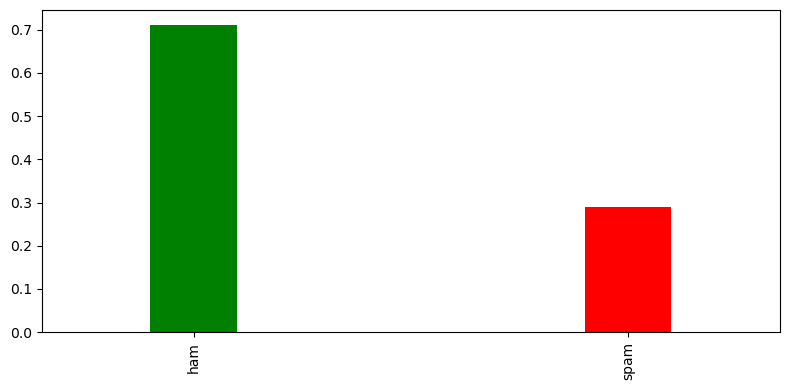

In [11]:
fig, axes =plt.subplots(figsize=(8,4))
df['label'].value_counts(normalize=True).plot.bar(width=0.2, color=('green','red'))

plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'label_num'}>]], dtype=object)

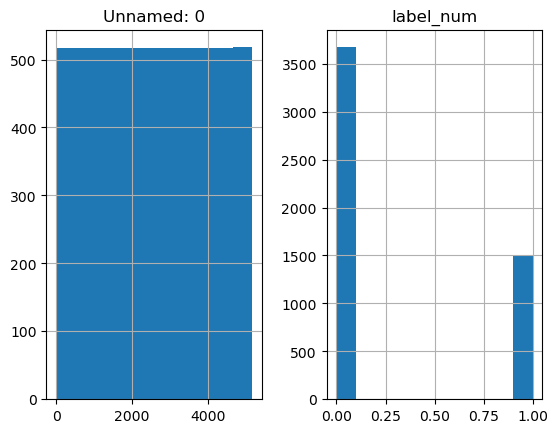

In [12]:
df.hist()

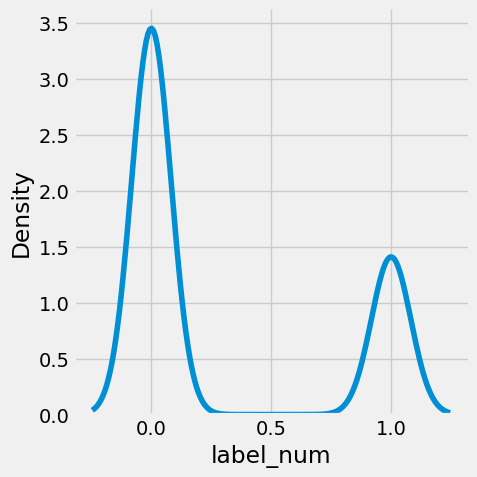

In [13]:
plt.style.use('fivethirtyeight')
sns.displot(data = df , x = 'label_num' , kind = 'kde', palette = 'PuRd')

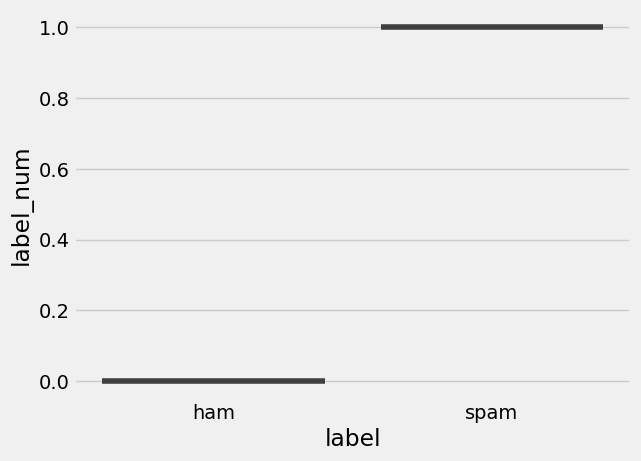

In [14]:
ax = sns.violinplot(x=df['label'], y=df['label_num'])

# Data Cleaning

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

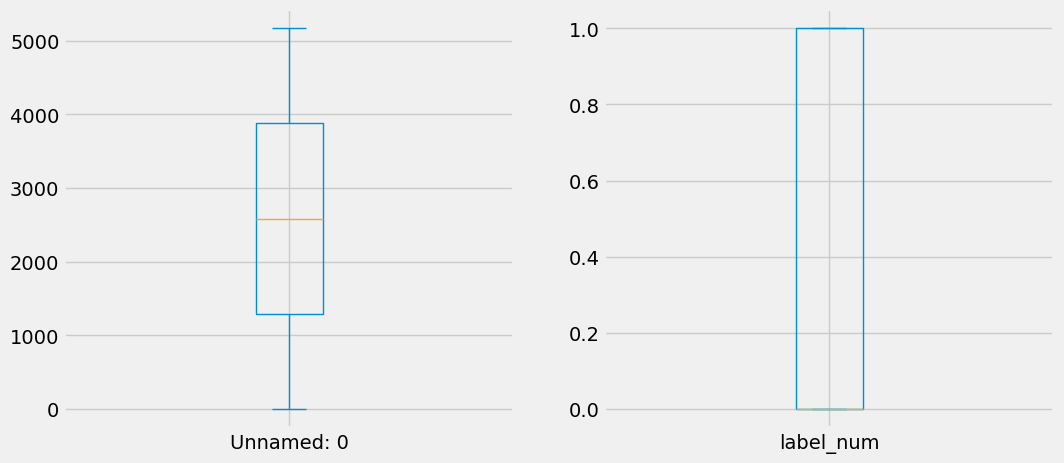

In [17]:
#to plot the outliers in the dataset
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(30,30))
plt.show()

In [18]:
#code snippet selects all the columns in the dataframe where the data type is 'object' and assigns them to a variable 'col'.
col = df.columns[df.dtypes=="object"]

In [19]:
# label-encoding
from sklearn.preprocessing import LabelEncoder
for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [20]:
df

,Unnamed: 0,label,text,label_num
0,605,0,1209,0
1,2349,0,1985,0
2,3624,0,2774,0
3,4685,1,3158,1
4,2030,0,3613,0
...,...,...,...,...
5166,1518,0,3254,0
5167,404,0,125,0
5168,2933,0,495,0
5169,1409,0,2223,0


<AxesSubplot:>

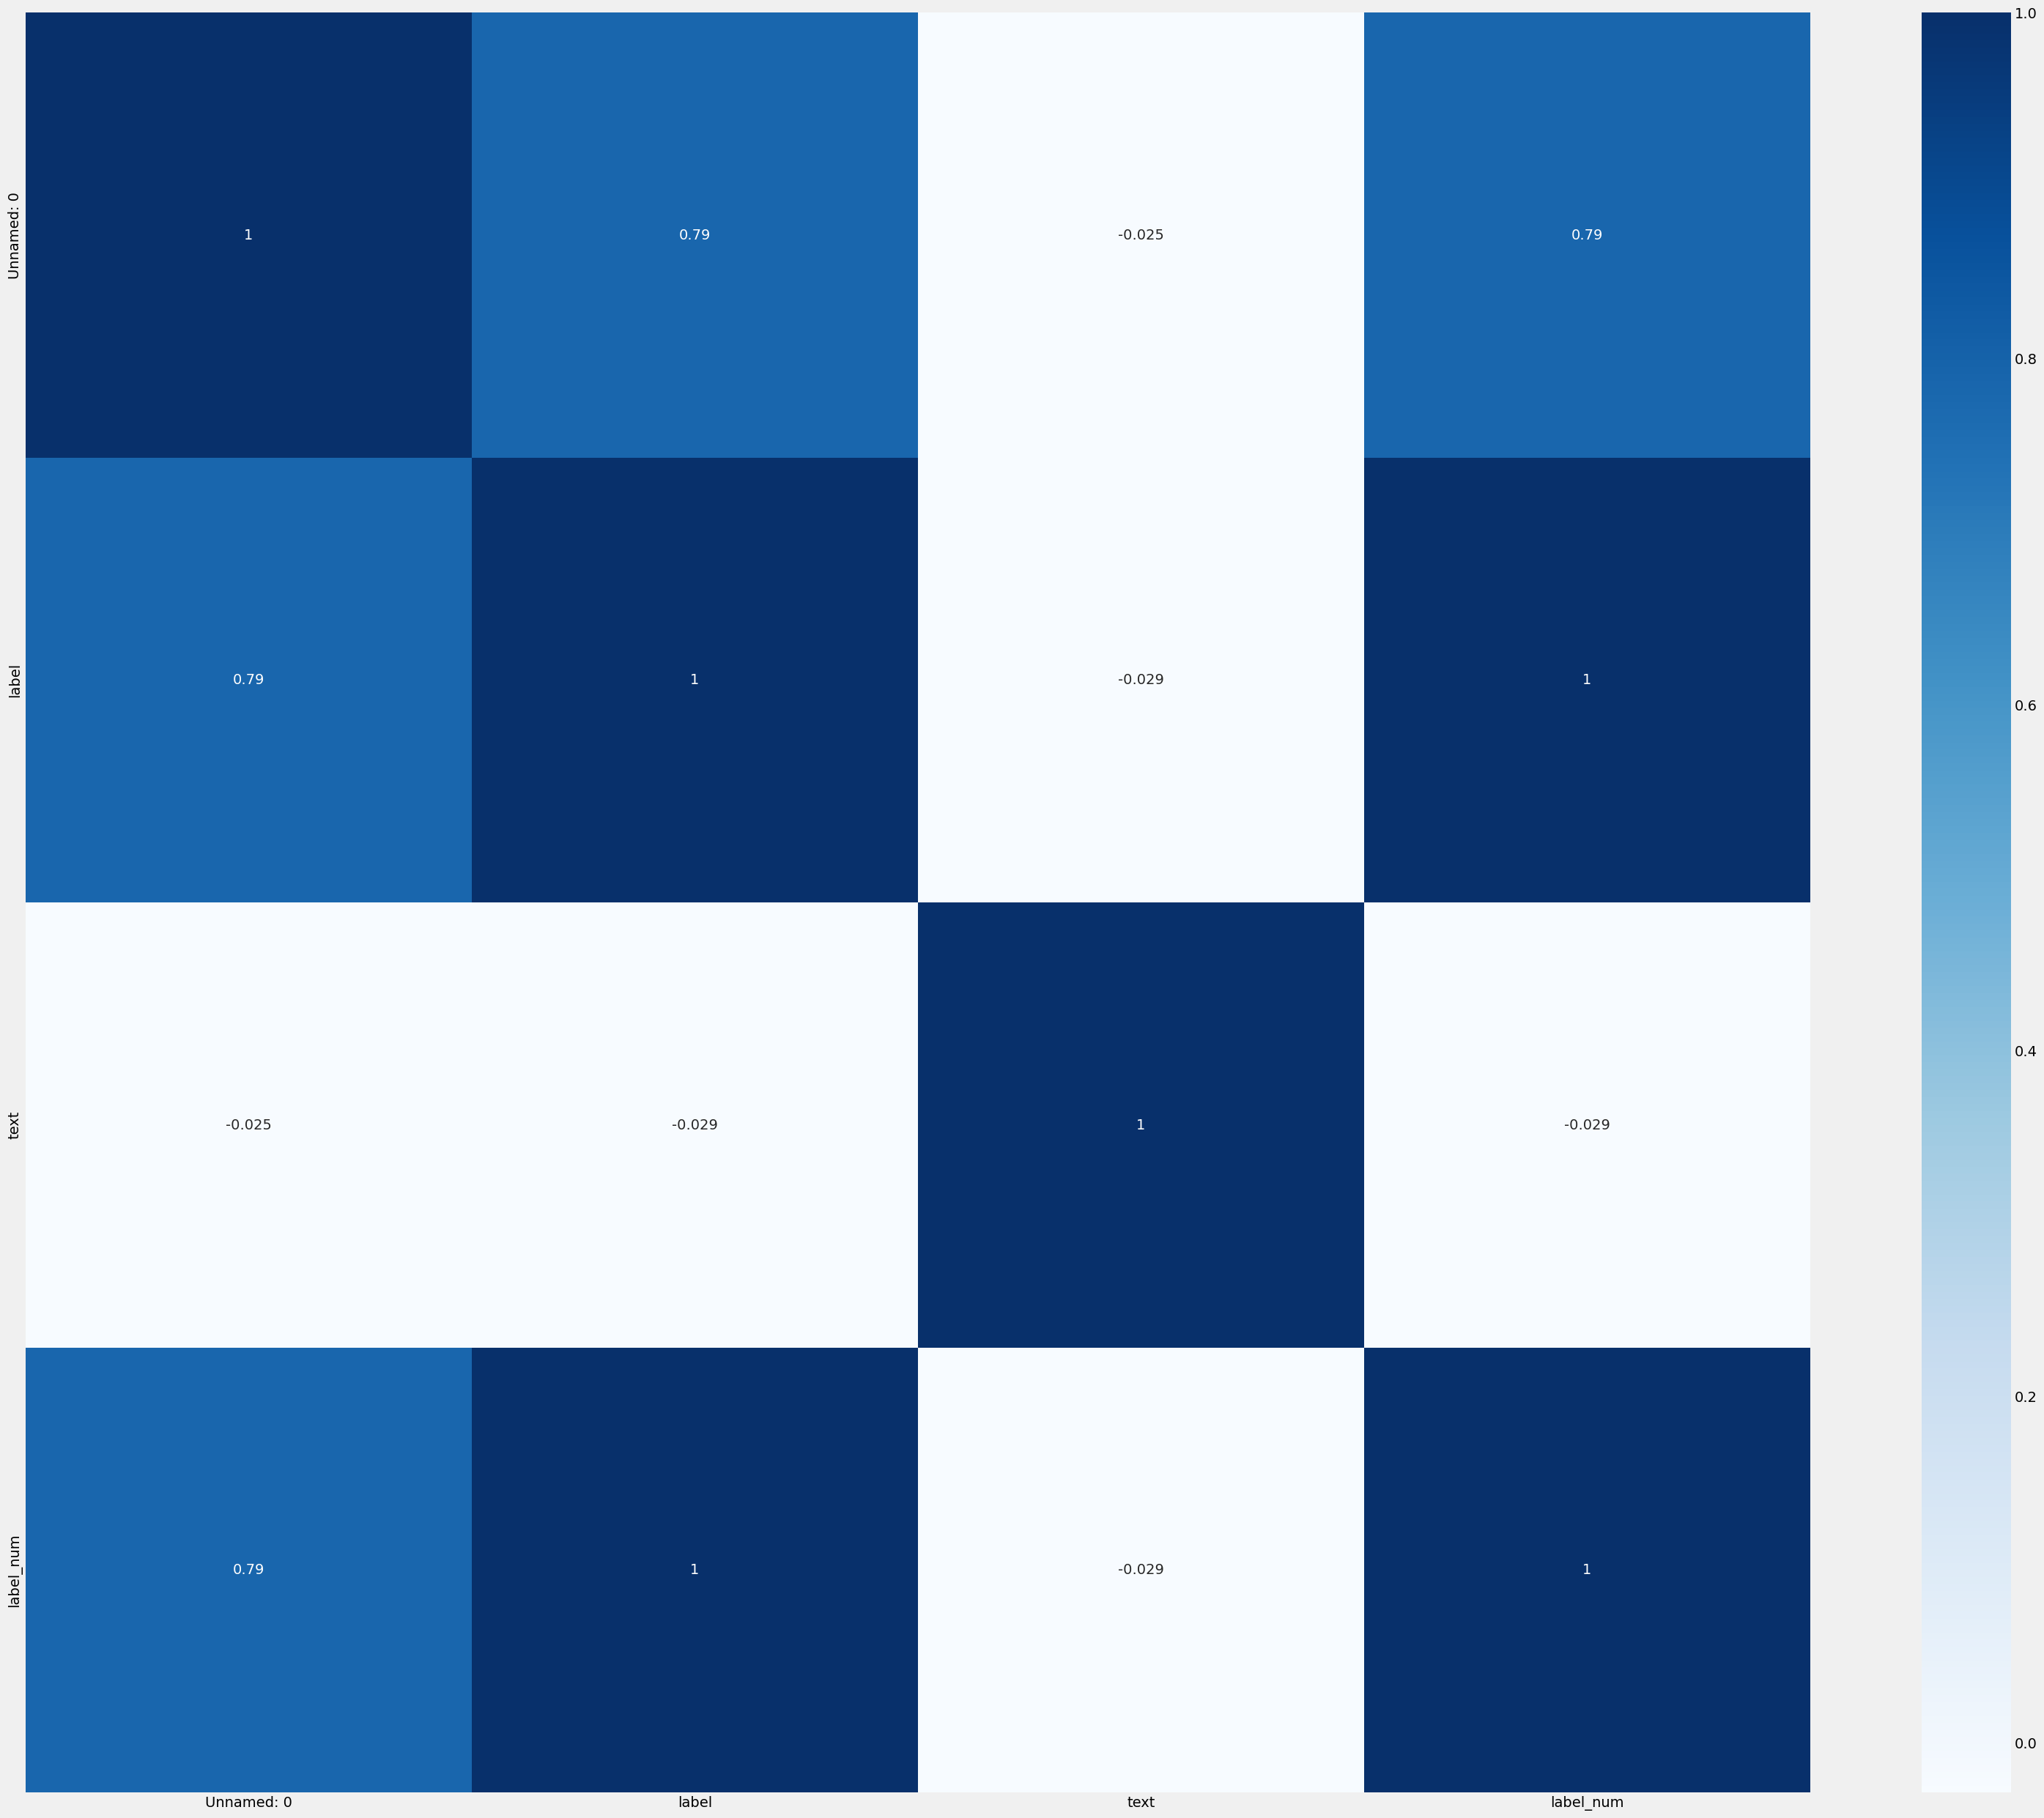

In [21]:
#code snippet uses the heatmap function from the seaborn module to plot a heatmap of the correlation matrix of the dataframe
import seaborn as sns
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
     

In [22]:
# In the dataframe feature named "label" is high corelated to the feature "label_num"  , therefore here droping it.
df.drop(['label'],axis = 1, inplace = True)

In [23]:
df

,Unnamed: 0,text,label_num
0,605,1209,0
1,2349,1985,0
2,3624,2774,0
3,4685,3158,1
4,2030,3613,0
...,...,...,...
5166,1518,3254,0
5167,404,125,0
5168,2933,495,0
5169,1409,2223,0


In [24]:
# separating input columns from output column
X = df.loc[:,df.columns!="label_num"]

In [25]:
y=df["label_num"]

### train-test split

In [26]:
# importing train_test_split library 
from sklearn.model_selection import train_test_split

In [149]:
# Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1234)

# ---------------------------------------Model Building--------------------------------------------

## Logistic regression

In [150]:
#importing LogisticRegression package

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [151]:
# importing accuracy_score library
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test,y_pred)

0.9992266047950503